In [23]:
import pandas as pd
import matplotlib.pyplot as plt


This notebook represents experiments with the implementation of part of the code from the article "Snomed2Vec: RandomWalk and Poincaré Embeddings of a Clinical Knowledge Base for Healthcare Analytics"   

source: https://gitlab.com/agarwal.khushbu/Snomed2Vec/-/blob/master/src/embedding_learning/poincare.py 


In [26]:
df=pd.read_csv('C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT_RELATIONSHIP.csv', sep='\t')

In [27]:
len(df['relationship_id'].unique())

272

In [75]:
df.groupby(by=['relationship_id']).count().sort_values(by=['concept_id_1'])


,concept_id_1,concept_id_2,valid_start_date,valid_end_date,invalid_reason
relationship_id,,,,,
Relative to of,3,3,3,3,0
Relative to,3,3,3,3,0
Surf character of,4,4,4,4,0
Has surface char,4,4,4,4,0
Has relative part,6,6,6,6,0
...,...,...,...,...,...
Non-avail ind of,353342,353342,353342,353342,0
Maps to,884542,884542,884542,884542,0
Mapped from,884542,884542,884542,884542,0


In [76]:
#check if the columns with subsumes and is a equal to each other
df[df.relationship_id=='Is a']['concept_id_1'].equals(df[df.relationship_id=='Subsumes']['concept_id_1'])

False

In [77]:
df=df[df.relationship_id=='Is a']

In [78]:
len(df.concept_id_1.unique())

995520

In [6]:
df_concept=pd.read_csv('C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT.csv', sep='\t')

c:\Users\Nusha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df_concept[df_concept.concept_id==281]

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
1241008,281,Medicare Managed Care,Payer,SOPT,Payer,S,11,19700101,20991231,NaN


In [8]:
df_merge=df.merge(df_concept, left_on='concept_id_1', right_on='concept_id', how='left')

In [9]:
df_merge_2=df_merge.merge(df_concept, left_on='concept_id_2', right_on='concept_id', how='left')

In [10]:

df_for_relationships=df_merge_2[['concept_id_1', 'concept_name_x', 'concept_id_2', 'concept_name_y', 'relationship_id']]

In [11]:
df_for_relationships

,concept_id_1,concept_name_x,concept_id_2,concept_name_y,relationship_id
0,281,Medicare Managed Care,280,Medicare,Is a
1,282,Medicare Health Maintenance Organization (HMO),281,Medicare Managed Care,Is a
2,283,Medicare Preferred Provider Organization (PPO),281,Medicare Managed Care,Is a
3,284,Medicare Point of Service (POS),281,Medicare Managed Care,Is a
4,285,Medicare Non-managed Care,280,Medicare,Is a
...,...,...,...,...,...
1695762,3661632,Thrombocytopenia due to Severe acute respirato...,37311061,COVID-19,Is a
1695763,3655975,Sepsis due to disease caused by Severe acute r...,37311061,COVID-19,Is a
1695764,3661748,Acute kidney injury due to disease caused by S...,37311061,COVID-19,Is a
1695765,3655976,Acute hypoxemic respiratory failure due to dis...,37311061,COVID-19,Is a


In [18]:
#function from https://gitlab.com/agarwal.khushbu/Snomed2Vec/-/blob/master/src/embedding_learning/poincare.py
def load_snomed_isa_relations(path):
    print('Parsing %s' % path)
    relations = []
    t_start = datetime.now()
    isa_relations = pd.read_csv(path, delimiter='|', usecols=['SCUI1', 'SCUI2']) 
    for row_id, row in isa_relations.iterrows():
        relations.append((row['SCUI2'], row['SCUI1']))
    return relations


In [12]:
relations=[]
for row_id, row in df_for_relationships.iterrows():
    relations.append((row['concept_name_x'], row['concept_name_y']))


In [103]:
short_rel_list=relations[0:1000]

In [104]:
short_rel_list

[('Medicare Managed Care', 'Medicare'),
 ('Medicare Health Maintenance Organization (HMO)', 'Medicare Managed Care'),
 ('Medicare Preferred Provider Organization (PPO)', 'Medicare Managed Care'),
 ('Medicare Point of Service (POS)', 'Medicare Managed Care'),
 ('Medicare Non-managed Care', 'Medicare'),
 ('Medicare Fee for Service (FFS)', 'Medicare Non-managed Care'),
 ('Medicare Non-managed Care - Other', 'Medicare Non-managed Care'),
 ('Dual Eligibility Medicare/Medicaid', 'Medicare'),
 ('Medicaid Managed Care', 'Medicaid'),
 ('Medicaid Health Management Organization (HMO)', 'Medicaid Managed Care'),
 ('Medicaid Preferred Provider Organization (PPO)', 'Medicaid Managed Care'),
 ('Medicaid Non-managed Care', 'Medicaid'),
 ('Medicaid - Other', 'Medicaid'),
 ('DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)',
  'Department of Defense'),
 ('DoD TRICARE Prime - Health Management Organization (HMO)',
  'DoD TRICARE, Civilian Health and Medical Program of 

In [105]:
from gensim.models.poincare import PoincareModel

In [110]:
model = PoincareModel(short_rel_list, size=2, burn_in=10)
model.train(epochs=30)

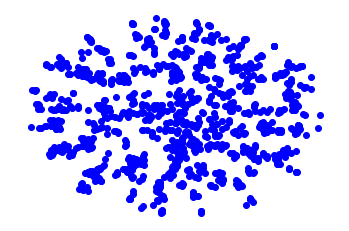

In [111]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.plot(model.kv.vectors[:,0], model.kv.vectors[:,1], 'bo')
plt.show()

In [17]:
model.kv.distance('Medicare Managed Care', 'Medicare')

0.1886781472040569

In [18]:
model.kv.distance('Medicare Managed Care', 'Medicaid')

0.38656610118505175

In [19]:
model.kv.distance('Medicare Managed Care',  'Indian Health Service (IHS) Program')

0.47924797147963577

In [20]:
model.kv.distances('Medicare Managed Care')

array([0.        , 0.18867815, 0.18391739, 0.09908007, 0.17915961,
       0.2750845 , 0.26616932, 0.29500101, 0.26653198, 0.3986695 ,
       0.3865661 , 0.43026233, 0.43174794, 0.36152676, 0.37085113,
       0.43253424, 0.4280794 , 0.45899275, 0.40382116, 0.46435682,
       0.4573117 , 0.43554984, 0.39374453, 0.37273835, 0.36948459,
       0.3316653 , 0.43724171, 0.43221784, 0.47924797, 0.41255495,
       0.46770485, 0.28188412, 0.45292896, 0.43334508, 0.42444369,
       0.35603586, 0.36655174, 0.38815897, 0.4281397 , 0.39008933,
       0.3552735 , 0.41372573, 0.39880703, 0.39066621, 0.34968392,
       0.36727441, 0.39229325, 0.36081347, 0.36017617, 0.41944751,
       0.45288487, 0.36201167, 0.34269402, 0.43058397, 0.38675412,
       0.48090447, 0.55315904, 0.49797091, 0.34587641, 0.29692686,
       0.32079828, 0.34833612, 0.32729687, 0.3960785 , 0.34118111,
       0.40507598, 0.44879299, 0.3197717 , 0.31254302, 0.36603029,
       0.39418582, 0.37500198, 0.34727527, 0.30940276, 0.41989

In [22]:
model.kv.get_vector('Medicare Managed Care')

array([-0.0022869 ,  0.00299112, -0.00200958,  0.00632274, -0.06524908,
       -0.02405351, -0.00260083,  0.00497127,  0.01154094, -0.00937415,
        0.00556683, -0.00606866,  0.02628655, -0.01193371, -0.00951324,
        0.00805059, -0.00735776, -0.01145834,  0.04951939,  0.00223066,
        0.03224431,  0.04217088, -0.01275819,  0.00283751, -0.02954229,
       -0.0195231 , -0.00624522, -0.00437425, -0.00711213, -0.02447589,
       -0.01767445,  0.0045415 , -0.02384775, -0.02704021, -0.00658045,
        0.01424553, -0.02972235, -0.01297174,  0.01730533, -0.01068032,
        0.03754758,  0.00071898, -0.02625507, -0.00630448,  0.01031059,
       -0.00088424, -0.03837844, -0.01650722, -0.00062512,  0.0032949 ])

In [37]:
len(model.kv.vectors)

114

In [125]:
model.kv.vectors[1050,0]

-0.7448468474910521

In [126]:
model.kv.vectors[1050,1]

0.19723322512481162

Implementation of the visualisation from https://musella.github.io/2018/11/27/poincare-embedding-amazon.html


In [114]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors


p = figure(title="Snomed 2D embedding after 30 epochs", #tools="wheel_zoom,pan,reset",
     match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

bins = p.hexbin(model.kv.vectors[:,0],model.kv.vectors[:,1], 0.03, hover_color="yellow", hover_alpha=0.3)


In [115]:
show(p)

Give names to the nodes 

In [130]:
for x in short_rel_list:
    print(x[0])

Medicare Managed Care
Medicare Health Maintenance Organization (HMO)
Medicare Preferred Provider Organization (PPO)
Medicare Point of Service (POS)
Medicare Non-managed Care
Medicare Fee for Service (FFS)
Medicare Non-managed Care - Other
Dual Eligibility Medicare/Medicaid
Medicaid Managed Care
Medicaid Health Management Organization (HMO)
Medicaid Preferred Provider Organization (PPO)
Medicaid Non-managed Care
Medicaid - Other
DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)
DoD TRICARE Prime - Health Management Organization (HMO)
DoD TRICARE Extra - Preferred Provider Organization (PPO)
DoD TRICARE Standard - Fee For Service (FFS)
DoD Uniformed Services Family Health Plan (USFHP) - Health Management Organization (HMO)
Department of Defense (DoD) other
Veteran Care
VA Outside VA facilities - Fee Basis
VA Outside VA facilities - Dental
VA Outside VA facilities - Vision
Indian Health Service (IHS) Program
Health Resources and Services Administration (

In [131]:
import numpy as np
names_xy = np.vstack(  [ model.kv.get_vector(str(x[0])) for x in short_rel_list])

In [141]:
communities_xy = [ np.vstack( [ model.kv.get_vector(str(x)) for x in rel] ) for rel in short_rel_list]

In [143]:
communities_xy[0]

array([[-0.28159793,  0.33988382],
       [-0.27779715,  0.30005709]])

In [138]:
names_xy[999]

array([0.32947868, 0.08436426])

In [146]:
# trick to get a different color for each community
points_colors = colors.named.__all__

# loop over communities and add them to the plot
for icomm,(col,comm) in enumerate(zip(points_colors,communities_xy)):
    print(icomm,(col,comm))
    name=str(icomm)
    p.scatter(comm[:,0],comm[:,1],color=col,alpha=0.3,name=name)
	# make hover to display the community id
    hover = HoverTool(names=[name])
    hover.tooltips = [ ('community',name) ]
    p.add_tools(hover)

0 ('aliceblue', array([[-0.28159793,  0.33988382],
       [-0.27779715,  0.30005709]]))
1 ('antiquewhite', array([[-0.30407142,  0.31891038],
       [-0.28159793,  0.33988382]]))
2 ('aqua', array([[-0.29955262,  0.36615967],
       [-0.28159793,  0.33988382]]))
3 ('aquamarine', array([[-0.3142313 ,  0.36188617],
       [-0.28159793,  0.33988382]]))
4 ('azure', array([[-0.37694933,  0.2861213 ],
       [-0.27779715,  0.30005709]]))
5 ('beige', array([[-0.33678871,  0.32066599],
       [-0.37694933,  0.2861213 ]]))
6 ('bisque', array([[-0.37719604,  0.32634092],
       [-0.37694933,  0.2861213 ]]))
7 ('black', array([[-0.32199293,  0.34656243],
       [-0.27779715,  0.30005709]]))
8 ('blanchedalmond', array([[-0.52663829, -0.22938515],
       [-0.49652552, -0.23573782]]))
9 ('blue', array([[-0.54426878, -0.21249566],
       [-0.52663829, -0.22938515]]))
10 ('blueviolet', array([[-0.55974248, -0.21362029],
       [-0.52663829, -0.22938515]]))
11 ('brown', array([[-0.52815172, -0.23382792]

In [147]:
show(p)